# oasis infobyte data science task 3

# car price prediction with machine learning

The price of a car depends on a lot of factors like the goodwill of the brand of the car,
features of the car, horsepower and the mileage it gives and many more. Car price
prediction is one of the major research areas in machine learning. So if you want to learn
how to train a car price prediction model then this project is for you.



In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Intern\oasis infobyte ds\Car prediction with machine learning\car data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [4]:
df.shape

(301, 9)

In [6]:
df.dtypes

Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

In [7]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')

In [8]:
def value_counts():
    for i in df.columns:
        print(df[i].value_counts())
value_counts()

city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: Car_Name, Length: 98, dtype: int64
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: Year, dtype: int64
0.45     8
0.60     8
5.25     7
4.50     7
0.20     6
        ..
3.80     1
3.45     1
5.90     1
35.00    1
11.50    1
Name: Selling_Price, Length: 156, dtype: int64
9.40     14
13.60    13
5.70      8
1.47      7
0.51      6
         ..
36.23     1
18.54     1
7.27      1
15.04     1
12.50     1
Name: Present_Price, Length: 148, dtype: int64
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400

In [9]:
df.shape

(301, 9)

In [10]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

In [12]:
df.duplicated().sum()

2

In [16]:
df=df.drop_duplicates()

In [17]:
df.shape

(299, 9)

In [19]:
numerical_feat =[]
categorical_feat=[]
for i in df.columns:
    if (df[i].dtypes !=object):
        numerical_feat.append(i)
    else:
        categorical_feat.append(i)

In [20]:
numerical_feat

['Year', 'Selling_Price', 'Present_Price', 'Driven_kms', 'Owner']

In [22]:
categorical_feat

['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
len(categorical_feat)

4

In [25]:
len(numerical_feat)

5

In [26]:
df.corr()

C:\Users\HP\AppData\Local\Temp\ipykernel_8036\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Year,Selling_Price,Present_Price,Driven_kms,Owner
Year,1.000000,0.234369,-0.053167,-0.525714,-0.181639
Selling_Price,0.234369,1.000000,0.876305,0.028566,-0.087880
Present_Price,-0.053167,0.876305,1.000000,0.205224,0.009948
Driven_kms,-0.525714,0.028566,0.205224,1.000000,0.089367
Owner,-0.181639,-0.087880,0.009948,0.089367,1.000000


C:\Users\HP\AppData\Local\Temp\ipykernel_8036\550830398.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ax = sns.heatmap(df.corr(), annot=True, linewidths=.1)


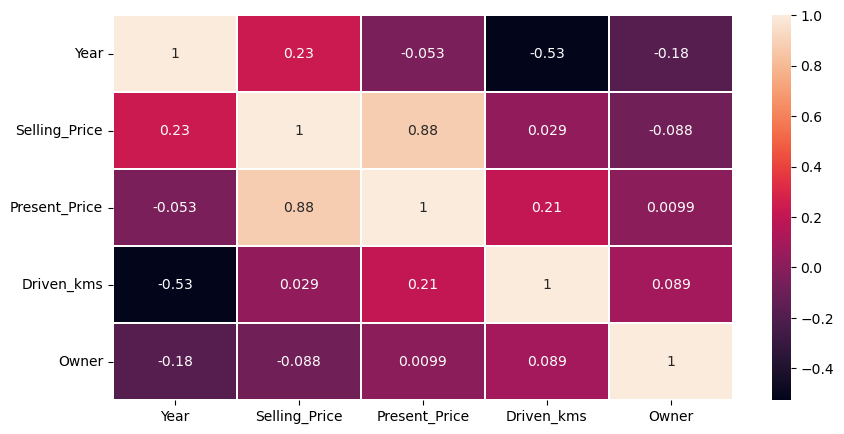

In [28]:
plt.figure(figsize = (10,5))
ax = sns.heatmap(df.corr(), annot=True, linewidths=.1)


In [29]:
df[categorical_feat].head()

,Car_Name,Fuel_Type,Selling_type,Transmission
0,ritz,Petrol,Dealer,Manual
1,sx4,Diesel,Dealer,Manual
2,ciaz,Petrol,Dealer,Manual
3,wagon r,Petrol,Dealer,Manual
4,swift,Diesel,Dealer,Manual


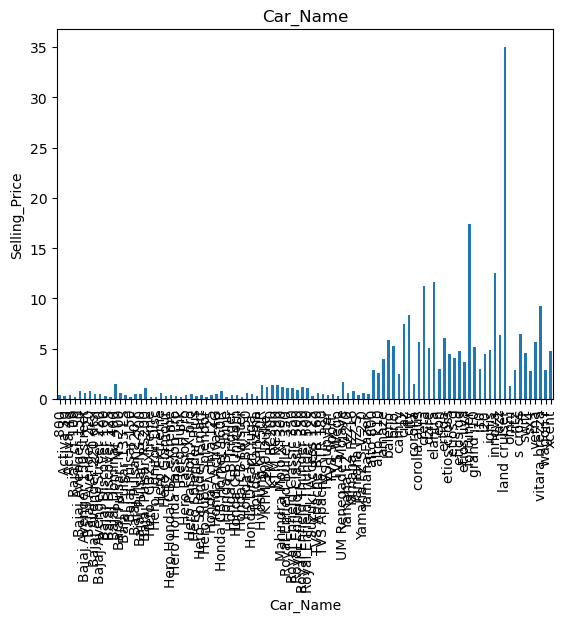

<Figure size 2000x2000 with 0 Axes>

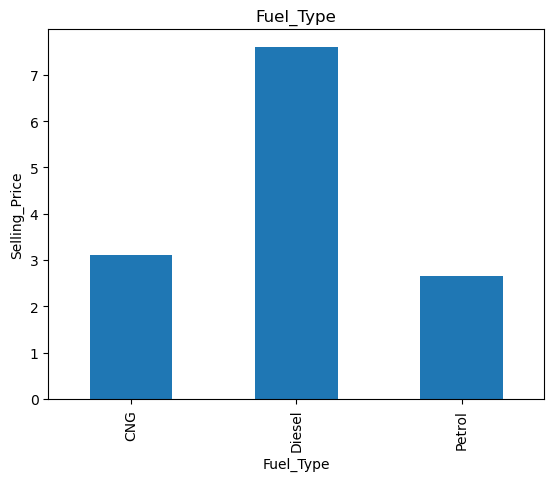

<Figure size 2000x2000 with 0 Axes>

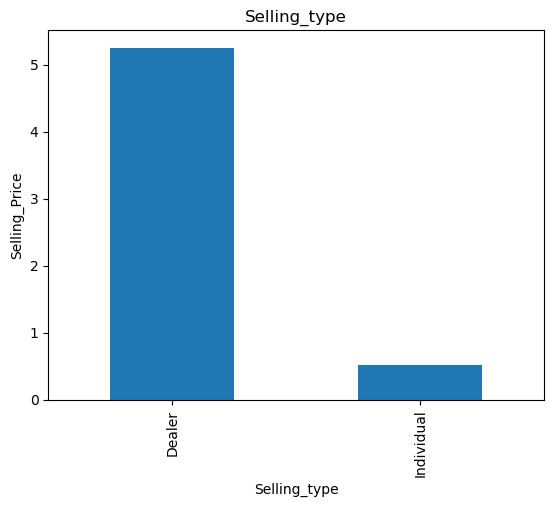

<Figure size 2000x2000 with 0 Axes>

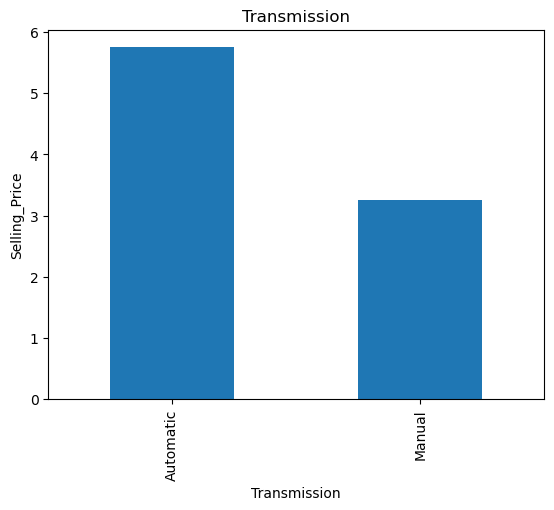

<Figure size 2000x2000 with 0 Axes>

In [33]:
## Lets Find the realtionship between them and Sale PRice

for feature in categorical_feat:
    df.groupby(feature)['Selling_Price'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('Selling_Price')
    plt.title(feature)
    plt.figure(figsize=(20,20))
    plt.show()

                                              ------#-------